In [131]:
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


# Q1
1) To Find the closest Association of a given Book

2) Try different values of support and confidence. Observe the change in number of rules for different support and confidence values

3) Change the minimum length in apriori algorithm

4) Visualize the obtained rules using different plots

In [132]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [133]:
book.shape

(2000, 11)

In [134]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Visualizing the frequency for the different book categories

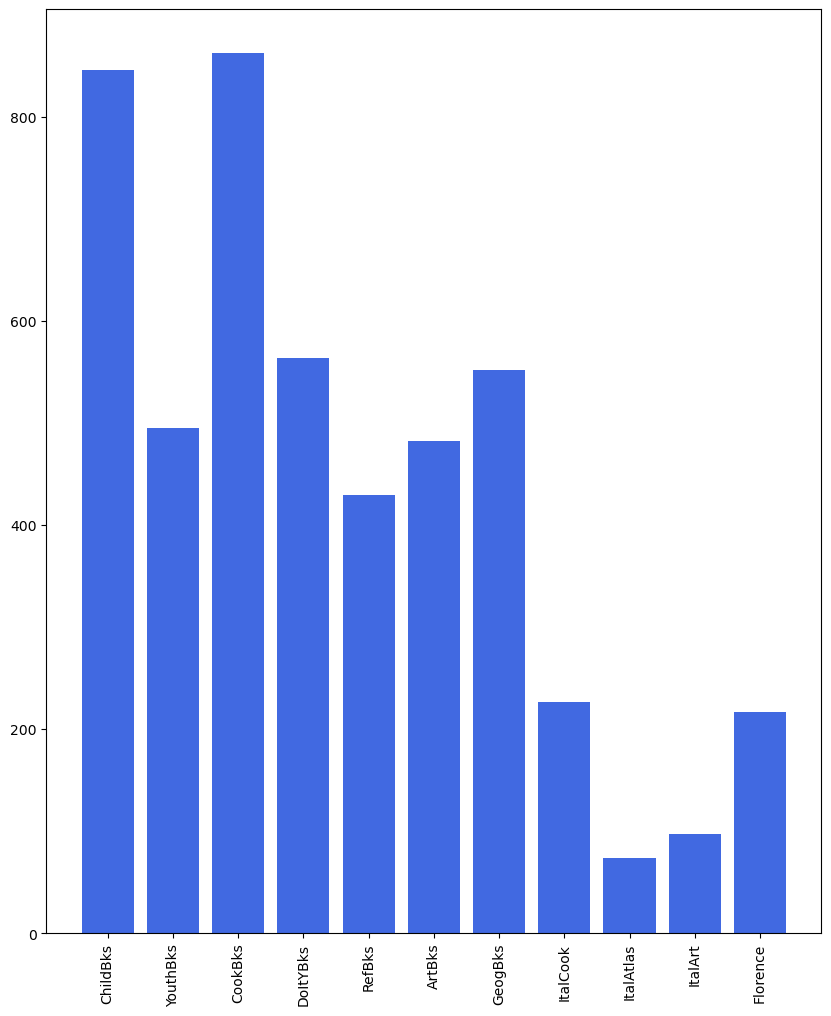

In [135]:
plt.bar(book.columns,book.sum(axis=0),color='royalblue')
plt.xticks(rotation = 90)
plt.show()

### Observations:

Most Frequent Bought Books are : Cooking books and Child books

# Association Rules 
### ( Implementing an apriori algorithm )

## <span style='color:green'> 1. Association rules with 10% Support and 80% confidence

In [136]:
book_sales=apriori(book,min_support=0.1,use_colnames=True)
book_sales

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


#### <span style='color:green'> Inference :
<span style='color:green'> The support value indicates: the percentage of purchases out of 100 that include each respective book category,

<span style='color:green'> such as ChildBks (42%), YouthBks (24%), CookBks (43%), DoltYBks (28%), and RefBks (21%) etc.

#### Constructing an association model, using lift as the evaluation metric

In [137]:
rule1=association_rules(book_sales,metric="lift",min_threshold=0.8)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


1 Antecedent support tells us probability of the antecedent products alone appear in dataset.

2 Consequents support tells us probability of the consequents products alone appear in dataset.

3 The support value is the value of the two products (Antecedents and Consequents).

4 Confidence is an indication of how often the rule has been found to be true.

5 lift Indicates how much more likely the consequent items are to appear when the antecedent items are present.

#### Sorting the books based on the association rule in ascending order

In [138]:
rule1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


### Visualization of obtained rule

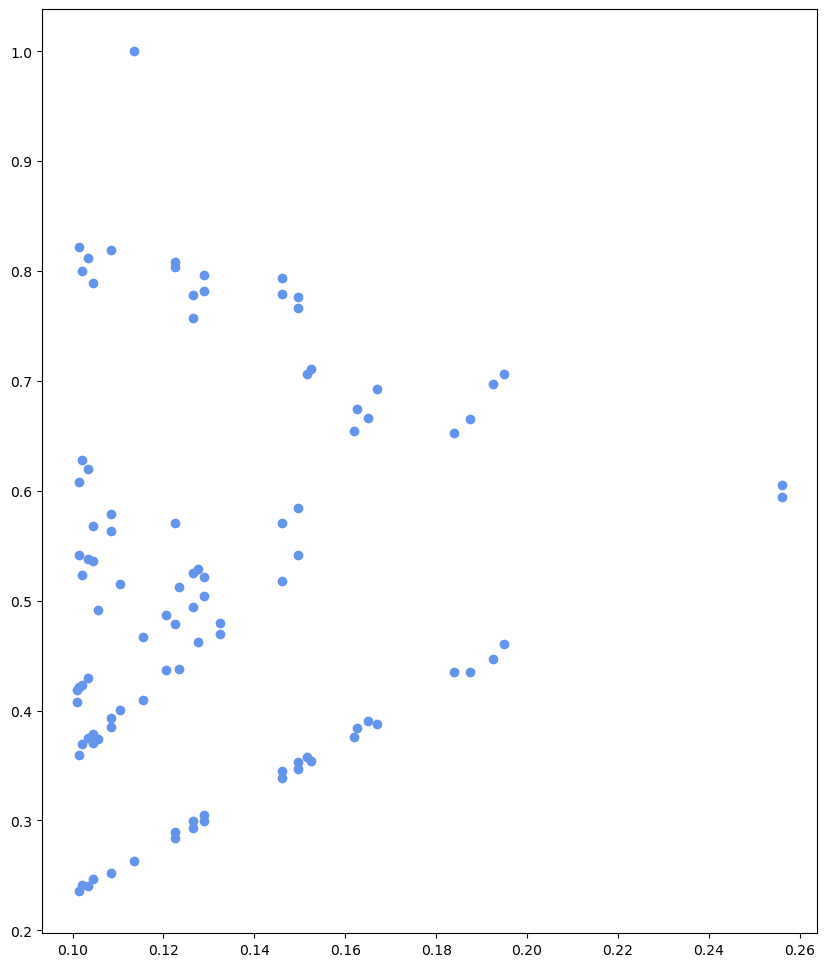

In [139]:
plt.scatter(rule1['support'],rule1['confidence'], color='cornflowerblue')

#### <span style='color: cadetblue'> By visualizing the scatter plot, you can analyze the relationship between support and confidence for the association rules. 
#### <span style='color: cadetblue'> It allows you to identify any patterns, clusters, or outliers in the data, which can help in understanding the strength and reliability of the rules.

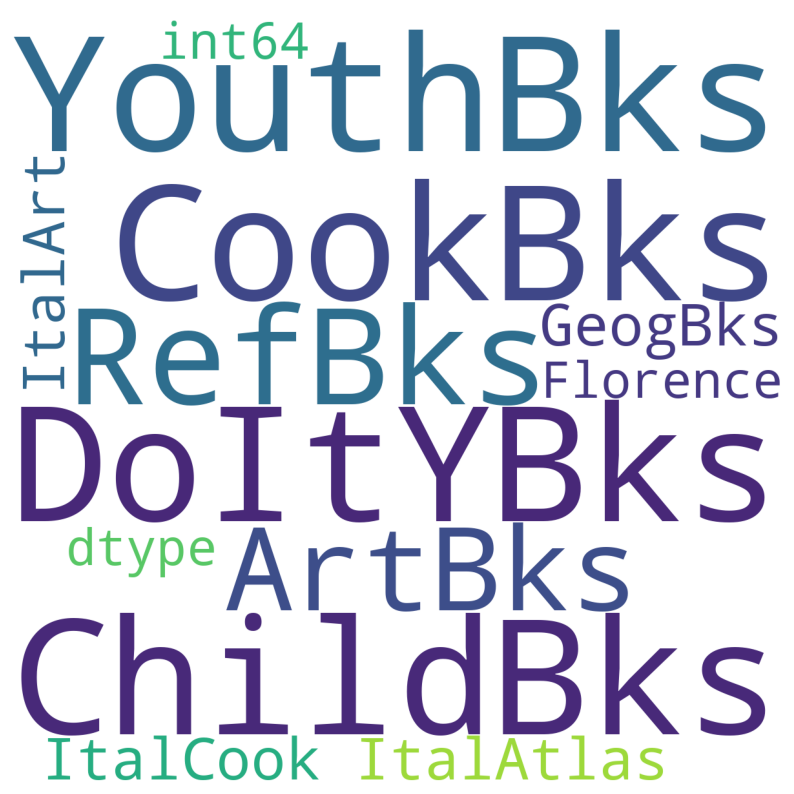

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(book.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Checking the Associated books for the category, "ChildBooks"

In [141]:
bookname='ChildBks'
rule1_b1=(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b1,["antecedents","consequents"]]

,antecedents,consequents
1,(ChildBks),(YouthBks)
2,(ChildBks),(CookBks)
5,(ChildBks),(DoItYBks)
7,(ChildBks),(RefBks)
9,(ChildBks),(ArtBks)
11,(ChildBks),(GeogBks)
40,"(YouthBks, ChildBks)",(CookBks)
42,"(ChildBks, CookBks)",(YouthBks)
44,(ChildBks),"(YouthBks, CookBks)"
46,"(DoItYBks, ChildBks)",(CookBks)


### Checking the Associated books for the category, "YouthBks"

In [142]:
bookname='YouthBks'
rule1_b2=(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b2,["antecedents","consequents"]]

,antecedents,consequents
0,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)
14,(YouthBks),(DoItYBks)
16,(YouthBks),(ArtBks)
18,(YouthBks),(GeogBks)
40,"(YouthBks, ChildBks)",(CookBks)
41,"(YouthBks, CookBks)",(ChildBks)
43,(YouthBks),"(ChildBks, CookBks)"


### Checking the Associated books for the category, "CookBks"

In [143]:
bookname='CookBks'
rule1_b3=(rule1.lift>1)&(rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b3,["antecedents","consequents"]]

,antecedents,consequents
3,(CookBks),(ChildBks)
13,(CookBks),(YouthBks)
21,(CookBks),(DoItYBks)
23,(CookBks),(RefBks)
25,(CookBks),(ArtBks)
27,(CookBks),(GeogBks)
29,(CookBks),(ItalCook)
41,"(YouthBks, CookBks)",(ChildBks)
42,"(ChildBks, CookBks)",(YouthBks)
45,(CookBks),"(YouthBks, ChildBks)"


### Checking the Associated books for the category, "DoItYBks"

In [144]:
bookname='DoItYBks'
rule1_b4=(rule1.lift>1)&(rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b4,["antecedents","consequents"]]

,antecedents,consequents
4,(DoItYBks),(ChildBks)
15,(DoItYBks),(YouthBks)
20,(DoItYBks),(CookBks)
31,(DoItYBks),(RefBks)
33,(DoItYBks),(ArtBks)
35,(DoItYBks),(GeogBks)
46,"(DoItYBks, ChildBks)",(CookBks)
47,"(DoItYBks, CookBks)",(ChildBks)
49,(DoItYBks),"(ChildBks, CookBks)"
70,"(GeogBks, DoItYBks)",(ChildBks)


### Checking the Associated books for the category, "RefBks"

In [145]:
bookname='RefBks'
rule1_b5=(rule1.lift>1)&(rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b5,["antecedents","consequents"]]

,antecedents,consequents
6,(RefBks),(ChildBks)
22,(RefBks),(CookBks)
30,(RefBks),(DoItYBks)
36,(RefBks),(GeogBks)
52,"(RefBks, ChildBks)",(CookBks)
53,"(RefBks, CookBks)",(ChildBks)
55,(RefBks),"(ChildBks, CookBks)"


### Checking the Associated books for the category, "ArtBks"

In [146]:
bookname='ArtBks'
rule1_b6=(rule1.lift>1)&(rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b6,["antecedents","consequents"]]


,antecedents,consequents
8,(ArtBks),(ChildBks)
17,(ArtBks),(YouthBks)
24,(ArtBks),(CookBks)
32,(ArtBks),(DoItYBks)
39,(ArtBks),(GeogBks)
58,"(ArtBks, ChildBks)",(CookBks)
59,"(ArtBks, CookBks)",(ChildBks)
61,(ArtBks),"(ChildBks, CookBks)"
76,"(GeogBks, ArtBks)",(ChildBks)
78,"(ArtBks, ChildBks)",(GeogBks)


### Checking the Associated books for the category, "GeogBks"

In [147]:

bookname='GeogBks'
rule1_b7 =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b7,["antecedents","consequents"]]

,antecedents,consequents
10,(GeogBks),(ChildBks)
19,(GeogBks),(YouthBks)
26,(GeogBks),(CookBks)
34,(GeogBks),(DoItYBks)
37,(GeogBks),(RefBks)
38,(GeogBks),(ArtBks)
64,"(GeogBks, ChildBks)",(CookBks)
65,"(GeogBks, CookBks)",(ChildBks)
67,(GeogBks),"(ChildBks, CookBks)"
70,"(GeogBks, DoItYBks)",(ChildBks)


### Checking the Associated books for the category, "ItalCook"

In [148]:
bookname='ItalCook'
rule1_b8 =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b8,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


### Checking the Associated books for the category, "ItalAtlas"

In [149]:
bookname='ItalAtlas'
rule1_b9 =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b9,["antecedents","consequents"]]

,antecedents,consequents


### Checking the Associated books for the category, "ItalArt"

In [150]:
bookname='ItalArt'
rule1_b10 =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b10,["antecedents","consequents"]]

,antecedents,consequents


### Checking the Associated books for the category, "Florence"

In [151]:
bookname='Florence'
rule1_b11 =(rule1.lift>1) & (rule1['antecedents'].astype(str).str.contains(bookname))
rule1.loc[rule1_b11,["antecedents","consequents"]]

,antecedents,consequents


## <span style='color:green'> 2. Association rules with 15% Support and 40% confidence

In [152]:
book_sales2=apriori(book,min_support=0.15,use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(DoItYBks, ChildBks)"


#### <span style='color:green'> Inference :
<span style='color:green'> The support value indicates: the percentage of purchases out of 100 that include each respective book category,

<span style='color:green'> such as ChildBks (42%), YouthBks (24%), CookBks (43%), DoltYBks (28%), and RefBks (21%) etc.

In [153]:
rule2=association_rules(book_sales2,metric="lift",min_threshold=0.4)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855



1 Antecedent support tells us probability of the antecedent products alone appear in dataset.

2 Consequents support tells us probability of the consequents products alone appear in dataset.

3 The support value is the value of the two products (Antecedents and Consequents).

4 Confidence is an indication of how often the rule has been found to be true.

5 lift Indicates how much more likely the consequent items are to appear when the antecedent items are present.

In [154]:
rule2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355


##### <span style='color:green'> Lift Ratio > 1 is a good influential rule in selecting the associated transactions

#### Visualization of obtained rule

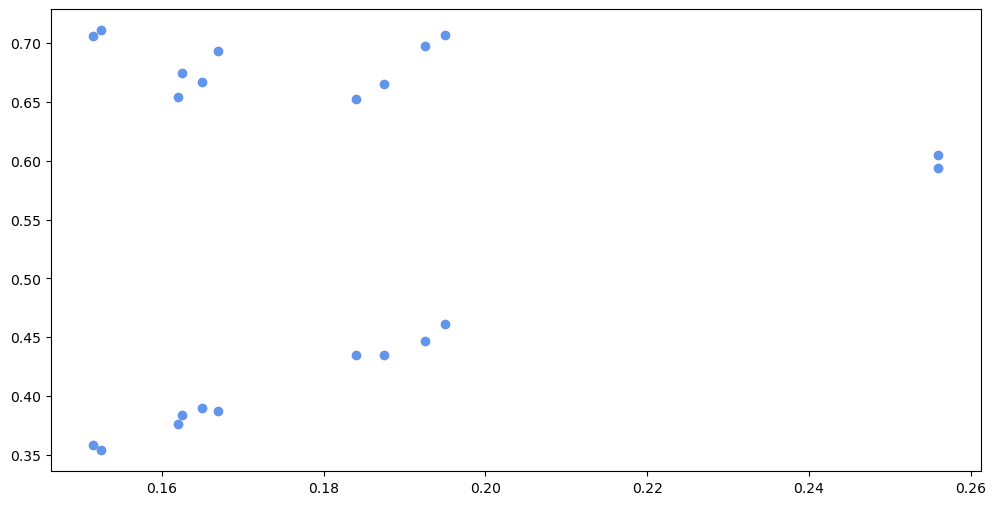

In [155]:
plt.figure(figsize=(12,6))
plt.scatter(rule2['support'],rule2['confidence'], color='cornflowerblue')

## <span style='color:green'> 3. Association rules with 5% Support and 80% confidence

In [156]:
book_sales3=apriori(book,min_support=0.05,use_colnames=True)
book_sales3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(GeogBks, ArtBks, DoItYBks, CookBks)"
98,0.0510,"(YouthBks, DoItYBks, ChildBks, CookBks, GeogBks)"


In [157]:
rule3=association_rules(book_sales3,metric="lift",min_threshold=0.8)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
658,(ChildBks),"(GeogBks, ArtBks, DoItYBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
659,(CookBks),"(GeogBks, ArtBks, DoItYBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
660,(ArtBks),"(GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307


In [158]:
rule3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
510,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
511,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
513,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,0.924629
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


#### Visualization of obtained rule¶

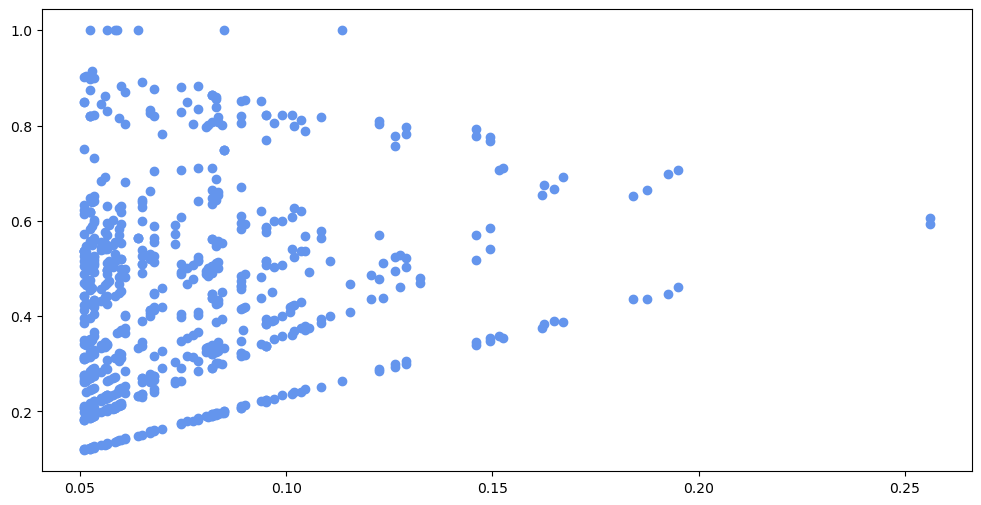

In [159]:
plt.figure(figsize=(12,6))
plt.scatter(rule3['support'],rule3['confidence'], color='cornflowerblue')

### Consildating the results

In [160]:
t={'Associan rule':pd.Series(['rule1','rule2','rule3']),
               'Lift':[max(rule1.lift),max(rule2.lift),max(rule3.lift)]
               }
t=pd.DataFrame(t)
t

,Associan rule,Lift
0,rule1,2.320186
1,rule2,1.670264
2,rule3,3.208789


### <span style='color:royalblue'> Predicting the associated books for Geology books using the third association rule

In [161]:
bookname='ChildBks'
rules3_GeogBks =(rule3.lift>1) & (rule3['antecedents'].astype(str).str.contains(bookname))
rule3.loc[rules3_GeogBks,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
1,(ChildBks),(YouthBks),1.576044
2,(ChildBks),(CookBks),1.404179
5,(ChildBks),(DoItYBks),1.542511
7,(ChildBks),(RefBks),1.669725
9,(ChildBks),(ArtBks),1.594028
...,...,...,...
647,"(DoItYBks, ChildBks)","(GeogBks, ArtBks, CookBks)",2.809284
651,"(ChildBks, CookBks)","(GeogBks, ArtBks, DoItYBks)",2.862800
652,"(ArtBks, ChildBks)","(GeogBks, DoItYBks, CookBks)",3.034385
653,"(GeogBks, ChildBks)","(ArtBks, DoItYBks, CookBks)",2.703044


## Conclusion:

From all the above association rules that is created, 

The rule 3 has a higher lift metric, thereby showing more associations to all the books. 

Thus, we can predict the association rules with last model, rule3